In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

# Read the CSV file
data = pd.read_csv("email.csv")

# Display the first few rows of the dataset
print(data.head())

Saving email.csv to email (1).csv
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
# Step 2: Preprocess the data
# Ensure the dataset has the required columns
assert 'Category' in data.columns and 'Message' in data.columns, "Dataset must contain 'category' and 'message' columns."

# Map labels to binary (1 for spam, 0 for ham)
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

In [4]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Check if any NaN values exist in the target column
print(data['Category'].isnull().sum())

Category    1
Message     0
dtype: int64
1


In [5]:
data = data.dropna(subset=['Category', 'Message'])

In [6]:
# Step 3: Split the data
X = data['Message']
y = data['Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
# Step 5: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [9]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test_tfidf)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       966
         1.0       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [10]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


In [11]:
# Step 7: Test with a new email
def predict_email(email_text):
    email_tfidf = tfidf_vectorizer.transform([email_text])
    prediction = model.predict(email_tfidf)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example usage
new_email = "You have won a free cruise! Call now to claim your prize."
print(f"Prediction for new email: {predict_email(new_email)}")

Prediction for new email: Spam


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

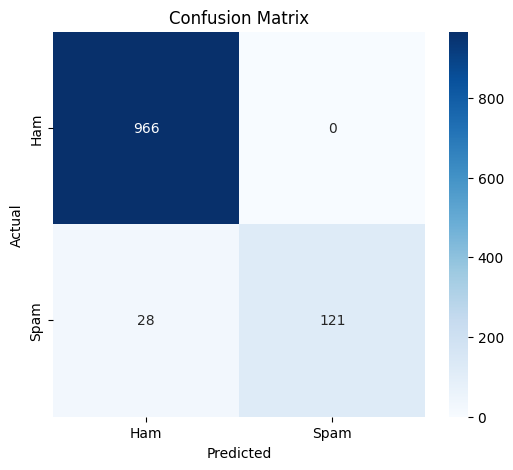

In [22]:
y_pred = model.predict(X_test_tfidf)
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for ROC Curve

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

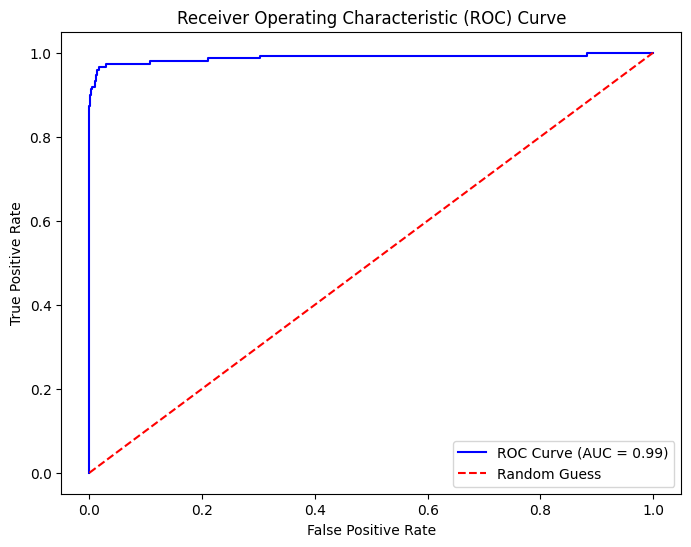

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

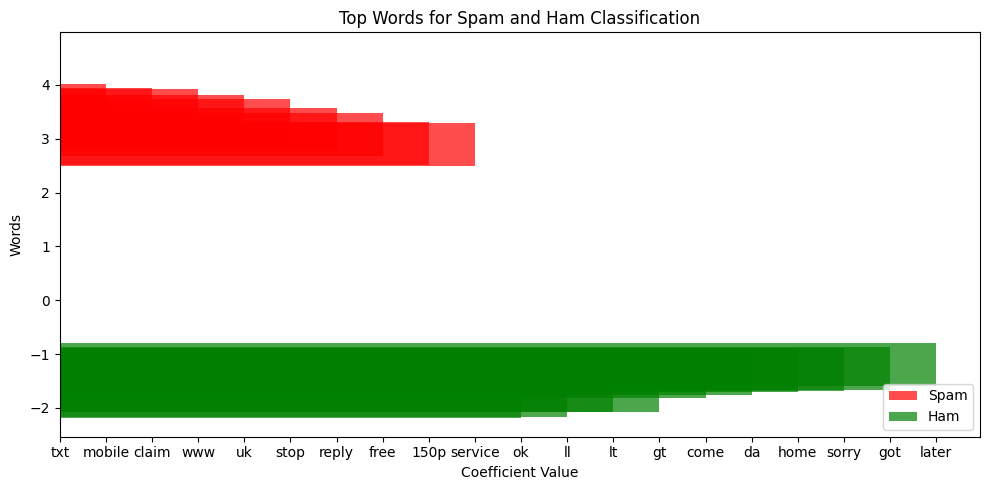

In [24]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Get the top 10 spam-indicative and ham-indicative words
top_spam_words = sorted(zip(coefficients, feature_names), reverse=True)[:10]
top_ham_words = sorted(zip(coefficients, feature_names))[:10]

# Plot the top words
spam_words, spam_coeffs = zip(*top_spam_words)
ham_words, ham_coeffs = zip(*top_ham_words)

plt.figure(figsize=(10, 5))
plt.barh(spam_words, spam_coeffs, color='red', alpha=0.7, label='Spam')
plt.barh(ham_words, ham_coeffs, color='green', alpha=0.7, label='Ham')
plt.title("Top Words for Spam and Ham Classification")
plt.xlabel("Coefficient Value")
plt.ylabel("Words")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()